# Term Project: Question quality assessment
### 20182650 Jang Jaehoon

### load data using Google Drive

In [33]:
# train data load
#from google.colab import drive
#drive.mount('/content/drive')

In [34]:
#import pandas as pd
#data = pd.read_csv('/content/drive/MyDrive/2023-1_ML/Term_Project/data/train_data/train_task_3_4.csv')
#data.head()

### load data using Github

In [35]:
!git clone https://github.com/leehahoon/question_quality_assessment.git git_dir

fatal: destination path 'git_dir' already exists and is not an empty directory.


In [36]:
import pandas as pd
data = pd.read_csv('git_dir/data/train_data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


## Data Overview

In [37]:
print(data.isnull().sum())
# Null value check

print(data.describe(include='all'))
# data summary

QuestionId       0
UserId           0
AnswerId         0
IsCorrect        0
CorrectAnswer    0
AnswerValue      0
dtype: int64
         QuestionId        UserId      AnswerId     IsCorrect  CorrectAnswer  \
count  1.382727e+06  1.382727e+06  1.382727e+06  1.382727e+06   1.382727e+06   
mean   4.682276e+02  3.036283e+03  7.544279e+05  5.373317e-01   2.390497e+00   
std    2.735797e+02  1.770599e+03  4.356190e+05  4.986046e-01   1.066479e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00   
25%    2.330000e+02  1.515000e+03  3.772935e+05  0.000000e+00   1.000000e+00   
50%    4.680000e+02  3.009000e+03  7.544530e+05  1.000000e+00   2.000000e+00   
75%    7.030000e+02  4.565000e+03  1.131772e+06  1.000000e+00   3.000000e+00   
max    9.470000e+02  6.147000e+03  1.508916e+06  1.000000e+00   4.000000e+00   

        AnswerValue  
count  1.382727e+06  
mean   2.437992e+00  
std    1.067624e+00  
min    1.000000e+00  
25%    2.000000e+00  
50%    2.000000e+00 

In [38]:
n_questions = len(data['QuestionId'].unique())
print(n_questions)
# question number

948


## Question Correct Answer Rate

In [39]:
result_df = pd.DataFrame()
# store result

In [40]:
result_df['Correct_Rate'] = data.groupby('QuestionId').agg(['mean'])['IsCorrect']
# Average of correct answers per QuestionID

result_df

,Correct_Rate
QuestionId,
0,0.443457
1,0.571429
2,0.385214
3,0.808757
4,0.401408
...,...
943,0.566528
944,0.142857
945,0.422336


## Question Correct Entropy

In [41]:
import pandas as pd
import scipy as sp
from scipy.stats import multinomial
import os
import pandas as pd
import numpy as np
import argparse

In [42]:
result_df['IsCorrect_Entropy'] = data.groupby('QuestionId')['IsCorrect'].agg(lambda x:multinomial.entropy(1,x.value_counts(normalize=True)).mean())
# Calculates the entropy of the polynomial distribution of the IsCorrect column for each question
# A smaller value means that the correct answer for that question is easier to predict.

result_df

,Correct_Rate,IsCorrect_Entropy
QuestionId,,
0,0.443457,0.686739
1,0.571429,0.682908
2,0.385214,0.666559
3,0.808757,0.488020
4,0.401408,0.673579
...,...,...
943,0.566528,0.684269
944,0.142857,0.410116
945,0.422336,0.681035


## Answer Value Entropy

In [43]:
result_df['AnswerValue_Entropy'] = data.groupby('QuestionId')['AnswerValue'].agg(lambda x:multinomial.entropy(1,x.value_counts(normalize=True)).mean())
# reference : starter_kit - sample_model_entropy
# A smaller value means the answer to the question is easier to predict.

result_df

,Correct_Rate,IsCorrect_Entropy,AnswerValue_Entropy
QuestionId,,,
0,0.443457,0.686739,1.194456
1,0.571429,0.682908,0.876006
2,0.385214,0.666559,1.331663
3,0.808757,0.488020,0.695423
4,0.401408,0.673579,1.324321
...,...,...,...
943,0.566528,0.684269,0.958544
944,0.142857,0.410116,1.312404
945,0.422336,0.681035,1.260934


## Subject

In [44]:
question_metadata = pd.read_csv('git_dir/data/metadata/question_metadata_task_3_4.csv')
question_metadata.head()

,QuestionId,SubjectId
0,684,"[3, 71, 98, 209]"
1,87,"[3, 71, 98, 209]"
2,679,"[3, 71, 98, 209]"
3,685,"[3, 71, 98, 209]"
4,222,"[3, 71, 98, 209]"


In [45]:
subj_metadata = pd.read_csv('git_dir/data/metadata/subject_metadata.csv')
subj_metadata.head()

,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2


In [46]:
import ast
question_data = question_metadata.sort_values('QuestionId')
question_data['SubjectList'] = question_data['SubjectId'].apply(lambda x: ast.literal_eval(x))
question_data['SubjectLen'] = question_data['SubjectList'].apply(len)
question_data.set_index('QuestionId', inplace=True)
question_data.head()

# get SubjectList's length

,SubjectId,SubjectList,SubjectLen
QuestionId,,,
0,"[3, 32, 40, 245]","[3, 32, 40, 245]",4
1,"[3, 32, 39, 228]","[3, 32, 39, 228]",4
2,"[3, 32, 33, 42, 144, 212]","[3, 32, 33, 42, 144, 212]",6
3,"[3, 32, 42, 211]","[3, 32, 42, 211]",4
4,"[3, 71, 88, 174]","[3, 71, 88, 174]",4


In [47]:
result_df['Subject_Score'] = 10-question_data['SubjectLen']
result_df

# The longer the length, the more diverse the problem area.
# so, 10 - (SubjectLen)

,Correct_Rate,IsCorrect_Entropy,AnswerValue_Entropy,Subject_Score
QuestionId,,,,
0,0.443457,0.686739,1.194456,6
1,0.571429,0.682908,0.876006,6
2,0.385214,0.666559,1.331663,4
3,0.808757,0.488020,0.695423,6
4,0.401408,0.673579,1.324321,6
...,...,...,...,...
943,0.566528,0.684269,0.958544,6
944,0.142857,0.410116,1.312404,6
945,0.422336,0.681035,1.260934,6


In [48]:
rank_df = pd.DataFrame()
rank_df['Correct_Rate'] = result_df['Correct_Rate']
rank_df['CR_inverse'] = 1-result_df['Correct_Rate']
rank_df['CR_inverse+SS'] = rank_df['CR_inverse'] + result_df['Subject_Score']
rank_df['IC'] = result_df['IsCorrect_Entropy']
rank_df['IC+AV'] = result_df['IsCorrect_Entropy'] + result_df['AnswerValue_Entropy']
rank_df['IC+AV+SS'] = result_df['IsCorrect_Entropy'] + result_df['AnswerValue_Entropy'] + result_df['Subject_Score']
rank_df['IC+AV+SS+CR_inv'] = result_df['IsCorrect_Entropy'] + result_df['AnswerValue_Entropy'] + result_df['Subject_Score'] + rank_df['CR_inverse']

rank_df

,Correct_Rate,CR_inverse,CR_inverse+SS,IC,IC+AV,IC+AV+SS,IC+AV+SS+CR_inv
QuestionId,,,,,,,
0,0.443457,0.556543,6.556543,0.686739,1.881195,7.881195,8.437739
1,0.571429,0.428571,6.428571,0.682908,1.558914,7.558914,7.987485
2,0.385214,0.614786,4.614786,0.666559,1.998222,5.998222,6.613008
3,0.808757,0.191243,6.191243,0.488020,1.183442,7.183442,7.374685
4,0.401408,0.598592,6.598592,0.673579,1.997900,7.997900,8.596491
...,...,...,...,...,...,...,...
943,0.566528,0.433472,6.433472,0.684269,1.642812,7.642812,8.076284
944,0.142857,0.857143,6.857143,0.410116,1.722520,7.722520,8.579663
945,0.422336,0.577664,6.577664,0.681035,1.941969,7.941969,8.519633


In [49]:
rank_df['CR_ranking'] = rank_df['Correct_Rate'].rank(method='first', ascending=False).astype('int16')
rank_df['CR_inverse_ranking'] = rank_df['CR_inverse'].rank(method='first', ascending=False).astype('int16')
rank_df['CR_inverse+SS_ranking']  = rank_df['CR_inverse+SS'].rank(method='first', ascending=False).astype('int16')
rank_df['IC_ranking'] = rank_df['IC'].rank(method='first', ascending=False).astype('int16')
rank_df['IC+AV_ranking'] = rank_df['IC+AV'].rank(method='first', ascending=False).astype('int16')
rank_df['IC+AV+SS_ranking'] = rank_df['IC+AV+SS'].rank(method='first', ascending=False).astype('int16')
rank_df['IC+AV+SS_+CR_inv_ranking'] = rank_df['IC+AV+SS+CR_inv'].rank(method='first', ascending=False).astype('int16')

rank_df


,Correct_Rate,CR_inverse,CR_inverse+SS,IC,IC+AV,IC+AV+SS,IC+AV+SS+CR_inv,CR_ranking,CR_inverse_ranking,CR_inverse+SS_ranking,IC_ranking,IC+AV_ranking,IC+AV+SS_ranking,IC+AV+SS_+CR_inv_ranking
QuestionId,,,,,,,,,,,,,,
0,0.443457,0.556543,6.556543,0.686739,1.881195,7.881195,8.437739,594,355,345,247,455,447,425
1,0.571429,0.428571,6.428571,0.682908,1.558914,7.558914,7.987485,328,619,608,293,802,788,747
2,0.385214,0.614786,4.614786,0.666559,1.998222,5.998222,6.613008,721,228,948,481,40,948,945
3,0.808757,0.191243,6.191243,0.488020,1.183442,7.183442,7.374685,27,922,908,915,915,901,912
4,0.401408,0.598592,6.598592,0.673579,1.997900,7.997900,8.596491,676,273,264,405,43,41,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.566528,0.433472,6.433472,0.684269,1.642812,7.642812,8.076284,336,613,602,274,750,736,706
944,0.142857,0.857143,6.857143,0.410116,1.722520,7.722520,8.579663,948,1,1,938,684,671,210
945,0.422336,0.577664,6.577664,0.681035,1.941969,7.941969,8.519633,639,310,300,324,284,279,309


In [50]:
#result_df['ranking'].to_csv('rank.csv', header=True, index_label='QuestionId')
rank_df['CR_ranking'].to_csv('CR_rank.csv', header=True, index_label='QuestionId')
rank_df['CR_inverse_ranking'].to_csv('CR_inverse_rank.csv', header=True, index_label='QuestionId')
rank_df['CR_inverse+SS_ranking'].to_csv('CR_inverse+SS_rank.csv', header=True, index_label='QuestionId')
rank_df['IC_ranking'].to_csv('IC_rank.csv', header=True, index_label='QuestionId')
rank_df['IC+AV_ranking'].to_csv('IC_AV_rank.csv', header=True, index_label='QuestionId')
rank_df['IC+AV+SS_ranking'].to_csv('IC_AV_SS_rank.csv', header=True, index_label='QuestionId')
rank_df['IC+AV+SS_+CR_inv_ranking'].to_csv('IC_AV_SS_CR_inv_rank.csv', header=True, index_label='QuestionId')


## Evaluate

In [51]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('git_dir/data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2
5,17,17,56,865,2,1,2,2.0,2
6,27,27,233,478,1,1,1,1.0,2
7,41,41,877,620,2,2,2,2.0,2
8,5,5,246,733,1,1,1,2.0,1
9,35,35,668,741,1,1,1,1.0,1


    Unnamed: 0.1  Unnamed: 0  left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS  \
0              0           0   909    318       2      2      2    1.0      2   
1             16          16   285    609       2      2      2    2.0      2   
2             48          48   132    271       1      2      2    2.0      1   
3             38          38   704    127       2      2      1    2.0      2   
4             33          33    16    586       1      1      2    2.0      2   
5             17          17    56    865       2      1      2    2.0      2   
6             27          27   233    478       1      1      1    1.0      2   
7             41          41   877    620       2      2      2    2.0      2   
8              5           5   246    733       1      1      1    2.0      1   
9             35          35   668    741       1      1      1    1.0      1   
10            11          11   691      4       2      2      2    1.0      1   
11            47          47

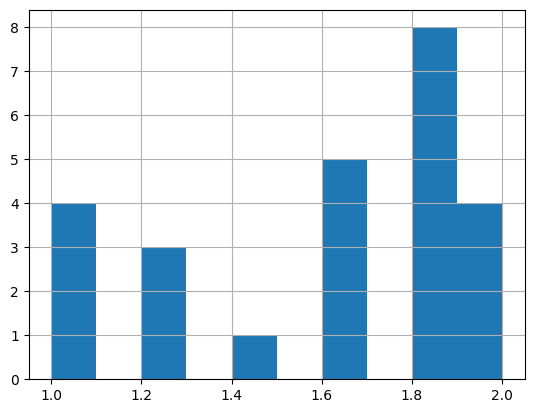

In [52]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()
print(eval_validation)

    Unnamed: 0.1  Unnamed: 0  left  right  T1_ALR  T2_CL  T3_GF  T4_MQ  T5_NS  \
0              0           0   909    318       2      2      2    1.0      2   
1             16          16   285    609       2      2      2    2.0      2   
2             48          48   132    271       1      2      2    2.0      1   
3             38          38   704    127       2      2      1    2.0      2   
4             33          33    16    586       1      1      2    2.0      2   
5             17          17    56    865       2      1      2    2.0      2   
6             27          27   233    478       1      1      1    1.0      2   
7             41          41   877    620       2      2      2    2.0      2   
8              5           5   246    733       1      1      1    2.0      1   
9             35          35   668    741       1      1      1    1.0      1   
10            11          11   691      4       2      2      2    1.0      1   
11            47          47

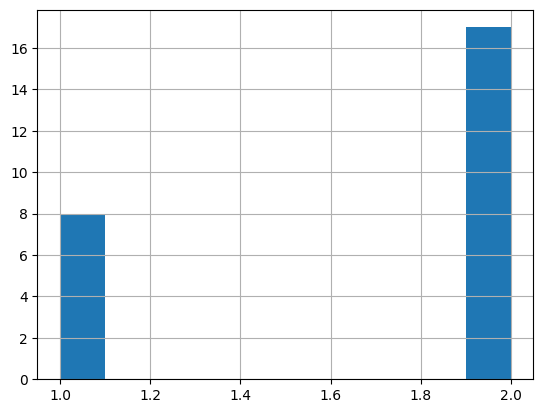

In [53]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()
print(eval_validation)

In [54]:
#template = pd.read_csv('/content/drive/MyDrive/2023-1_ML/Term_Project/submission/template.csv')
template1 = pd.read_csv('CR_rank.csv')
template1.columns = ['QuestionId', 'ranking']

template2 = pd.read_csv('CR_inverse_rank.csv')
template2.columns = ['QuestionId', 'ranking']

template3 = pd.read_csv('IC_AV_rank.csv')
template3.columns = ['QuestionId', 'ranking']

template4 = pd.read_csv('IC_AV_SS_rank.csv')
template4.columns = ['QuestionId', 'ranking']

template5 = pd.read_csv('IC_AV_SS_CR_inv_rank.csv')
template5.columns = ['QuestionId', 'ranking']

template6 = pd.read_csv('CR_inverse+SS_rank.csv')
template6.columns = ['QuestionId', 'ranking']

template7 = pd.read_csv('IC_rank.csv')
template7.columns = ['QuestionId', 'ranking']


In [55]:
template1.head()

,QuestionId,ranking
0,0,594
1,1,328
2,2,721
3,3,27
4,4,676


In [56]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    return submission_preference


In [57]:
CR_result = evaluate(eval_validation, template1)
CR_inverse_result = evaluate(eval_validation, template2)
IC_AV_result = evaluate(eval_validation, template3)
IC_AV_SS_result = evaluate(eval_validation, template4)
IC_AV_SS_CR_inv_result = evaluate(eval_validation, template5)
CR_inverse_SS_result = evaluate(eval_validation, template6)
IC_result = evaluate(eval_validation, template7)


[1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1]
[2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1]


In [58]:
public_result = eval_validation['preference']
print(public_result)

0     2
1     2
2     2
3     2
4     2
5     2
6     1
7     2
8     1
9     1
10    2
11    2
12    2
13    2
14    1
15    2
16    2
17    2
18    2
19    1
20    1
21    2
22    2
23    1
24    1
Name: preference, dtype: int64


In [59]:
estimate_df = pd.DataFrame(CR_result, columns=['CR_estimate'])
estimate_df['CR_inverse_estimate'] = CR_inverse_result
estimate_df['IC_AV_estimate'] = IC_AV_result
estimate_df['IC_AV_SS_estimate'] = IC_AV_SS_result
estimate_df['IC_AV_SS_CR_inv_estimate'] = IC_AV_SS_CR_inv_result
estimate_df['CR_inverse_SS_estimate'] = CR_inverse_SS_result
estimate_df['IC_estimate'] = IC_result

estimate_df

,CR_estimate,CR_inverse_estimate,IC_AV_estimate,IC_AV_SS_estimate,IC_AV_SS_CR_inv_estimate,CR_inverse_SS_estimate,IC_estimate
0,1,2,2,2,2,2,2
1,1,2,2,2,2,2,2
2,1,2,2,2,2,2,1
3,1,2,2,2,2,2,2
4,1,2,2,2,2,2,1
5,1,2,2,2,2,2,1
6,2,1,1,1,1,1,1
7,1,2,2,2,2,2,1
8,2,1,1,1,1,1,1
9,1,2,2,2,2,2,2


In [60]:
def getCompareDF(eval_validation, estimate_df):
  df = pd.DataFrame()
  df['truth'] = eval_validation['preference']
  df['estimate'] = estimate_df
  df['evaluate'] = df['truth'] == df['estimate']
  df['score'] = df['evaluate'].apply(lambda x: 1 if x else 0)
  total_score = df['score'].sum()
  total_percent = total_score/df['score'].count()
  return (total_score, total_percent)

CR_score, CR_percent = getCompareDF(eval_validation, estimate_df['CR_estimate'])
CR_inverse_score, CR_inverse_percent = getCompareDF(eval_validation, estimate_df['CR_inverse_estimate'])
IC_AV_score, IC_AV_percent = getCompareDF(eval_validation, estimate_df['IC_AV_estimate'])
IC_AV_SS_score, IC_AV_SS_percent = getCompareDF(eval_validation, estimate_df['IC_AV_SS_estimate'])
IC_AV_SS_CR_inv_score, IC_AV_SS_CR_inv_percent = getCompareDF(eval_validation, estimate_df['IC_AV_SS_CR_inv_estimate'])
CR_inverse_SS_score, CR_inverse_SS_percent = getCompareDF(eval_validation, estimate_df['CR_inverse_SS_estimate'])
IC_score, IC_percent = getCompareDF(eval_validation, estimate_df['IC_estimate'])

print(f'CR_score: {CR_score}, CR_percent: {CR_percent}')
print(f'CR_inverse_score: {CR_inverse_score}, CR_inverse_percent: {CR_inverse_percent}')
print(f'CR_inverse_SS_score: {CR_inverse_SS_score}, CR_inverse_SS_percent: {CR_inverse_SS_percent}')
print(f'IC_score: {IC_score}, IC_percent: {IC_percent}')
print(f'IC_AV_score: {IC_AV_score}, IC_AV_percent: {IC_AV_percent}')
print(f'IC_AV_SS_score: {IC_AV_SS_score}, IC_AV_SS_percent: {IC_AV_SS_percent}')
print(f'IC_AV_SS_CR_inv_score: {IC_AV_SS_CR_inv_score}, IC_AV_SS_CR_inv_percent: {IC_AV_SS_CR_inv_percent}')


CR_score: 6, CR_percent: 0.24
CR_inverse_score: 19, CR_inverse_percent: 0.76
CR_inverse_SS_score: 20, CR_inverse_SS_percent: 0.8
IC_score: 19, IC_percent: 0.76
IC_AV_score: 21, IC_AV_percent: 0.84
IC_AV_SS_score: 22, IC_AV_SS_percent: 0.88
IC_AV_SS_CR_inv_score: 22, IC_AV_SS_CR_inv_percent: 0.88


## Evaluate Test(private)

In [61]:
eval_test = pd.read_csv('git_dir/data/test_data/quality_response_remapped_private.csv')
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['preference'] = calc_preference(eval_test['score'])

eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,15,15,145,762,2,2,2,2.0,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1,1.2,1
2,25,25,278,195,1,1,1,1.0,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1,1.2,1


In [62]:
CR_result = evaluate(eval_test, template1)
CR_inverse_result = evaluate(eval_test, template2)
IC_AV_result = evaluate(eval_test, template3)
IC_AV_SS_result = evaluate(eval_test, template4)
IC_AV_SS_CR_inv_result = evaluate(eval_test, template5)
CR_inverse_SS_result = evaluate(eval_test, template6)
IC_result = evaluate(eval_test, template7)


[1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1]
[2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2]
[2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2]


In [63]:
test_df = pd.DataFrame(CR_result, columns=['CR_estimate'])
test_df['CR_inverse_estimate'] = CR_inverse_result
test_df['IC_AV_estimate'] = IC_AV_result
test_df['IC_AV_SS_estimate'] = IC_AV_SS_result
test_df['IC_AV_SS_CR_inv_estimate'] = IC_AV_SS_CR_inv_result
test_df['CR_inverse_SS_estimate'] = CR_inverse_SS_result
test_df['IC_estimate'] = IC_result

test_df.head()


,CR_estimate,CR_inverse_estimate,IC_AV_estimate,IC_AV_SS_estimate,IC_AV_SS_CR_inv_estimate,CR_inverse_SS_estimate,IC_estimate
0,1,2,2,2,2,2,1
1,1,2,1,1,1,2,1
2,2,1,1,1,1,1,1
3,2,1,1,1,1,1,1
4,2,1,1,1,1,1,1


In [64]:
CR_score, CR_percent = getCompareDF(eval_test, test_df['CR_estimate'])
CR_inverse_score, CR_inverse_percent = getCompareDF(eval_test, estimate_df['CR_inverse_estimate'])
IC_AV_score, IC_AV_percent = getCompareDF(eval_test, test_df['IC_AV_estimate'])
IC_AV_SS_score, IC_AV_SS_percent = getCompareDF(eval_test, test_df['IC_AV_SS_estimate'])
IC_AV_SS_CR_inv_score, IC_AV_SS_CR_inv_percent = getCompareDF(eval_test, test_df['IC_AV_SS_CR_inv_estimate'])
CR_inverse_SS_score, CR_inverse_SS_percent = getCompareDF(eval_test, test_df['CR_inverse_SS_estimate'])
IC_score, IC_percent = getCompareDF(eval_test, test_df['IC_estimate'])

print(f'CR_score: {CR_score}, CR_percent: {CR_percent}')
print(f'CR_inverse_score: {CR_inverse_score}, CR_inverse_percent: {CR_inverse_percent}')
print(f'CR_inverse_SS_score: {CR_inverse_SS_score}, CR_inverse_SS_percent: {CR_inverse_SS_percent}')
print(f'IC_score: {IC_score}, IC_percent: {IC_percent}')
print(f'IC_AV_score: {IC_AV_score}, IC_AV_percent: {IC_AV_percent}')
print(f'IC_AV_SS_score: {IC_AV_SS_score}, IC_AV_SS_percent: {IC_AV_SS_percent}')
print(f'IC_AV_SS_CR_inv_score: {IC_AV_SS_CR_inv_score}, IC_AV_SS_CR_inv_percent: {IC_AV_SS_CR_inv_percent}')


CR_score: 8, CR_percent: 0.32
CR_inverse_score: 9, CR_inverse_percent: 0.36
CR_inverse_SS_score: 17, CR_inverse_SS_percent: 0.68
IC_score: 12, IC_percent: 0.48
IC_AV_score: 15, IC_AV_percent: 0.6
IC_AV_SS_score: 15, IC_AV_SS_percent: 0.6
IC_AV_SS_CR_inv_score: 16, IC_AV_SS_CR_inv_percent: 0.64
